## Dataset instruction

This project used a EEG data while the partcipant is playing a video game. The different event in the game is recording associated with the EEG data. After pre-processing the raw EEG data, I try to build a model to predict the event by using the EEG data. The data is download from openneuro website to local storage. The link is here: https://openneuro.org/datasets/ds003517/versions/1.1.0/download. The oringial data includes 17 partcipants EEG data. For demo purpose, here, I only analyze a result from 1 session of 1 participant, the sub-001 run 2nd EEG data. For this raw data, there are 8 files, named includes: **_sub-001_task-ContinuousVideoGamePlay_run-02..._** I uploaded these files into docker and run the following code. 

## Pre-maunipulation of EEG raw for project

### Install package for loading EEG data

In [1]:
pip install mne

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pymatreader

Note: you may need to restart the kernel to use updated packages.


### import mne package to loading EEG data

In [3]:
import mne
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
df=mne.io.read_raw_eeglab("sub-001_task-ContinuousVideoGamePlay_run-02_eeg.set")
raw=df.to_data_frame()
raw.head()

Reading /home/jovyan/sub-001_task-ContinuousVideoGamePlay_run-02_eeg.fdt


/tmp/ipykernel_6005/1187889491.py:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  df=mne.io.read_raw_eeglab("sub-001_task-ContinuousVideoGamePlay_run-02_eeg.set")


,time,Fp1,Fz,F3,F7,FT9,FC5,FC1,C3,T7,...,C6,C2,FC4,FT8,F6,F2,AF4,AF8,VEOG,HEOG
0,0,-21805.175781,8995.654297,-21166.406250,-24166.259766,-8705.029297,-17463.330078,-21718.554688,-24657.031250,-23761.914062,...,-4462.255859,-9600.634766,-11207.080078,-2099.218750,-15616.308594,-10426.318359,2097.119141,-25508.056641,2417823.00,-1478198.125
1,2,-21804.736328,8995.166016,-21168.115234,-24155.468750,-8712.548828,-17456.933594,-21721.826172,-24674.560547,-23774.169922,...,-4456.933594,-9600.195312,-11201.513672,-2121.533203,-15618.945312,-10427.099609,2094.921875,-25515.673828,2422977.75,-1474376.875
2,4,-21800.292969,8995.166016,-21167.529297,-24149.609375,-8687.158203,-17477.783203,-21724.316406,-24688.867187,-23782.958984,...,-4454.589844,-9597.216797,-11191.699219,-2103.857422,-15610.058594,-10422.509766,2099.267578,-25508.349609,2426007.75,-1473209.875
3,6,-21804.248047,8994.384766,-21164.404297,-24148.046875,-8684.326172,-17458.593750,-21721.826172,-24678.662109,-23753.613281,...,-4456.005859,-9599.072266,-11198.876953,-2105.273437,-15618.359375,-10424.560547,2097.216797,-25510.400391,2427519.00,-1470739.500
4,8,-21808.740234,8994.287109,-21161.816406,-24163.476562,-8707.568359,-17481.005859,-21715.576172,-24648.291016,-23796.289062,...,-4463.281250,-9604.980469,-11220.751953,-2091.308594,-15626.220703,-10429.638672,2095.214844,-25508.398438,2425031.00,-1470432.875


### parse event label

In [5]:
event=df.annotations.to_data_frame()
event["onset"]=event["onset"].astype('datetime64[ns]').astype(np.int64) / int(1e6)
event=event.rename(columns={'onset':'time', 'description':'event'})
event

,time,duration,event
0,0.0,0.000,boundary
1,90440.0,0.002,S100
2,91758.0,0.002,S 90
3,92110.0,0.002,S 97
4,94466.0,0.002,S 90
...,...,...,...
4065,2794426.0,0.002,S 90
4066,2795344.0,0.002,S 97
4067,2795390.0,0.002,S 90
4068,2795580.0,0.002,S 97


### combine EEG voltage with event

In [6]:
total_raw=pd.merge(raw, event, on='time', how='outer')

In [7]:
total_raw[total_raw["event"].notna()]

,time,Fp1,Fz,F3,F7,FT9,FC5,FC1,C3,T7,...,FC4,FT8,F6,F2,AF4,AF8,VEOG,HEOG,duration,event
0,0,-21805.175781,8995.654297,-21166.406250,-24166.259766,-8705.029297,-17463.330078,-21718.554688,-24657.031250,-23761.914062,...,-11207.080078,-2099.218750,-15616.308594,-10426.318359,2097.119141,-25508.056641,2417823.00,-1478198.125,0.000,boundary
45220,90440,-21771.093750,9238.134766,-21424.804688,-24336.230469,-9256.396484,-17795.996094,-21656.103516,-24823.535156,-23910.888672,...,-11373.828125,-2084.130859,-15762.939453,-10767.285156,1993.017578,-25537.158203,2426934.00,-1456691.375,0.002,S100
45879,91758,-21739.697266,9239.648438,-21443.164062,-24323.730469,-9246.875000,-17794.726562,-21673.144531,-24828.857422,-23905.908203,...,-11375.732422,-2083.935547,-15754.736328,-10758.300781,1997.998047,-25497.851562,2416711.75,-1463790.250,0.002,S 90
46055,92110,-21748.535156,9234.179688,-21454.980469,-24322.216797,-9241.357422,-17794.873047,-21681.445312,-24842.041016,-23912.939453,...,-11385.058594,-2101.074219,-15758.496094,-10765.136719,1980.175781,-25506.835938,2419548.25,-1464256.375,0.002,S 97
47233,94466,-21708.349609,9256.201172,-21432.910156,-24315.527344,-9262.597656,-17733.203125,-21646.533203,-24790.039062,-23957.568359,...,-11353.710937,-2098.242188,-15696.777344,-10748.828125,2011.816406,-25463.037109,2428428.00,-1448358.250,0.002,S 90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397213,2794426,-14546.093750,18093.066406,-19020.166016,-21284.423828,-13737.060547,-15662.744141,-19010.400391,-22904.687500,-20859.960937,...,-14277.929688,-2694.580078,-16121.484375,-15504.248047,284.326172,-22191.845703,2631674.75,-1564920.500,0.002,S 90
1397672,2795344,-14527.978516,18106.347656,-19019.873047,-21294.042969,-13755.419922,-15662.939453,-19015.966797,-22927.197266,-20844.238281,...,-14248.828125,-2689.111328,-16105.712891,-15499.560547,301.806641,-22152.587891,2628972.75,-1552898.000,0.002,S 97
1397695,2795390,-14541.259766,18102.783203,-19031.542969,-21317.431641,-13769.580078,-15686.181641,-19021.923828,-22933.398438,-20861.962891,...,-14263.134766,-2659.423828,-16101.611328,-15506.933594,297.851562,-22152.978516,2627633.75,-1554651.500,0.002,S 90
1397790,2795580,-14530.761719,18109.570312,-19025.439453,-21310.009766,-13773.095703,-15679.394531,-19015.820312,-22934.912109,-20860.791016,...,-14228.955078,-2709.912109,-16119.726562,-15495.556641,304.052734,-22160.644531,2625056.75,-1555989.125,0.002,S 97


### add event label to raw data

In [8]:
#df=total_raw.copy()
for i in range(1, len(total_raw)):
    if pd.notna(total_raw.at[i, "event"]):
        total_raw.loc[i-1, "add_event"] =total_raw.at[i, 'event']
        total_raw.loc[i, "add_event"] =total_raw.at[i, 'event']
        total_raw.loc[i+1, "add_event"] =total_raw.at[i, 'event']

In [9]:
project_df=total_raw[total_raw["add_event"].notna()]

In [10]:
project_df.to_csv("project_data.csv", index=False)

### EDA and visulization

In [11]:
project_df

,time,Fp1,Fz,F3,F7,FT9,FC5,FC1,C3,T7,...,FT8,F6,F2,AF4,AF8,VEOG,HEOG,duration,event,add_event
45219,90438,-21769.482422,9240.136719,-21422.412109,-24330.224609,-9247.070312,-17797.998047,-21655.273438,-24823.046875,-23892.431641,...,-2094.091797,-15756.542969,-10766.748047,1996.484375,-25531.982422,2435132.00,-1452026.625,NaN,NaN,S100
45220,90440,-21771.093750,9238.134766,-21424.804688,-24336.230469,-9256.396484,-17795.996094,-21656.103516,-24823.535156,-23910.888672,...,-2084.130859,-15762.939453,-10767.285156,1993.017578,-25537.158203,2426934.00,-1456691.375,0.002,S100,S100
45221,90442,-21771.484375,9237.841797,-21426.074219,-24336.962891,-9255.029297,-17803.662109,-21657.275391,-24829.296875,-23903.076172,...,-2095.996094,-15769.042969,-10766.894531,1995.312500,-25533.251953,2420388.25,-1461376.875,NaN,NaN,S100
45878,91756,-21738.427734,9239.892578,-21440.722656,-24317.773438,-9237.841797,-17788.623047,-21675.048828,-24838.232422,-23898.681641,...,-2086.376953,-15748.388672,-10757.226562,2000.927734,-25495.312500,2423879.00,-1458952.375,NaN,NaN,S 90
45879,91758,-21739.697266,9239.648438,-21443.164062,-24323.730469,-9246.875000,-17794.726562,-21673.144531,-24828.857422,-23905.908203,...,-2083.935547,-15754.736328,-10758.300781,1997.998047,-25497.851562,2416711.75,-1463790.250,0.002,S 90,S 90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397790,2795580,-14530.761719,18109.570312,-19025.439453,-21310.009766,-13773.095703,-15679.394531,-19015.820312,-22934.912109,-20860.791016,...,-2709.912109,-16119.726562,-15495.556641,304.052734,-22160.644531,2625056.75,-1555989.125,0.002,S 97,S 97
1397791,2795582,-14537.402344,18104.736328,-19030.371094,-21319.775391,-13787.304688,-15686.328125,-19019.775391,-22936.181641,-20874.414062,...,-2703.173828,-16116.894531,-15501.904297,301.513672,-22161.523438,2624422.50,-1557184.500,NaN,NaN,S 97
1398114,2796228,-14564.111328,18107.226562,-19041.650391,-21355.712891,-13818.798828,-15693.652344,-19020.605469,-22945.068359,-20864.550781,...,-2687.744141,-16108.837891,-15517.041016,298.974609,-22158.935547,2627796.75,-1546720.625,NaN,NaN,S 98
1398115,2796230,-14573.437500,18105.664062,-19041.308594,-21348.974609,-13815.625000,-15691.943359,-19020.898438,-22947.021484,-20860.742188,...,-2672.656250,-16099.316406,-15516.992187,294.189453,-22160.400391,2627720.25,-1549998.500,0.002,S 98,S 98


In [12]:
project_df.shape

(12207, 69)

In [13]:
project_df["add_event"].unique()

array(['S100', 'S 90', 'S 97', 'S 93', 'S 98', 'S 92', 'S 91', 'S 94',
       'S 99', 'S101', 'S102', 'S103', 'S104'], dtype=object)

In [14]:
print(project_df.columns.to_list())

['time', 'Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'AF7', 'AF3', 'AFz', 'F1', 'F5', 'FT7', 'FC3', 'FCz', 'C1', 'C5', 'TP7', 'CP3', 'P1', 'P5', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'P6', 'P2', 'CP4', 'TP8', 'C6', 'C2', 'FC4', 'FT8', 'F6', 'F2', 'AF4', 'AF8', 'VEOG', 'HEOG', 'duration', 'event', 'add_event']


#### plot raw data

Using matplotlib as 2D backend.
Opening raw-browser...


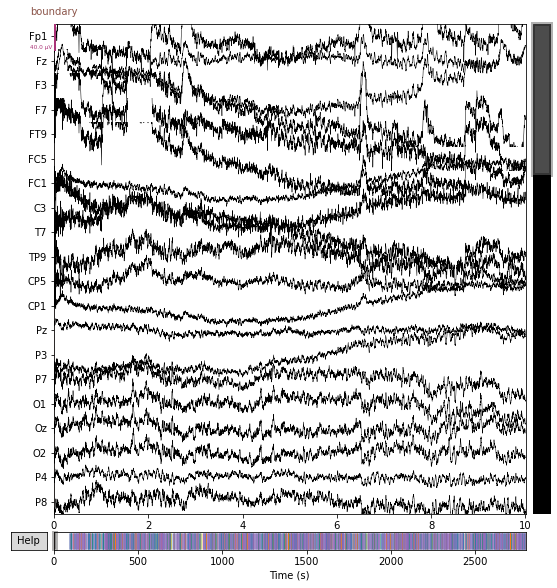

In [15]:
# plot raw data
fig = df.plot()

#### plot front brain area channel of S 90 and S 99 event

In [16]:
project_df_melt=pd.melt(project_df, id_vars=['time', 'event', 'add_event'], value_vars=['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'AF7', 'AF3', 'AFz', 'F1', 'F5', 'FT7', 'FC3', 'FCz', 'C1', 'C5', 'TP7', 'CP3', 'P1', 'P5', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'P6', 'P2', 'CP4', 'TP8', 'C6', 'C2', 'FC4', 'FT8', 'F6', 'F2', 'AF4', 'AF8', 'VEOG', 'HEOG'])

<AxesSubplot:xlabel='time', ylabel='value'>

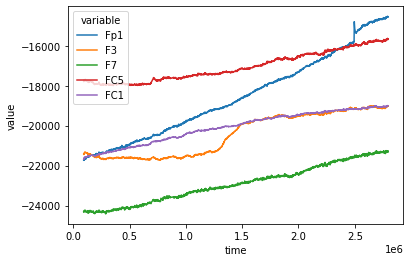

In [17]:
sns.lineplot(x="time", y="value",
             hue="variable",
             data=project_df_melt[project_df_melt["add_event"].isin(["S 90"]) & project_df_melt["variable"].isin(['Fp1', 'F3', 'F7', 'FC5', 'FC1'])])

<AxesSubplot:xlabel='time', ylabel='value'>

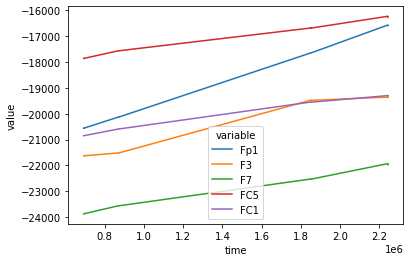

In [18]:
sns.lineplot(x="time", y="value",
             hue="variable",
             data=project_df_melt[project_df_melt["add_event"].isin(["S 99"]) & project_df_melt["variable"].isin(['Fp1', 'F3', 'F7', 'FC5', 'FC1'])])

#### plot all channel in box plot of S 90 and S 99 event

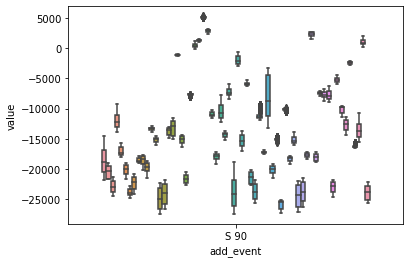

In [19]:
sns.boxplot(x="add_event", y="value",
                hue="variable",
                data=project_df_melt[project_df_melt["add_event"].isin(["S 90"]) & ~project_df_melt["variable"].isin(["Fz", "VEOG", "HEOG"])])
plt.legend([],[], frameon=False)

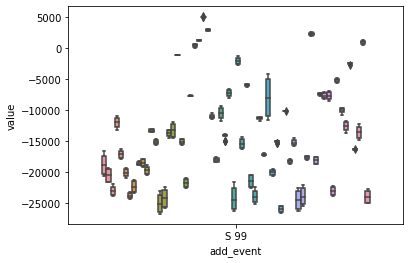

In [20]:
sns.boxplot(x="add_event", y="value",
                hue="variable",
                data=project_df_melt[project_df_melt["add_event"].isin(["S 99"]) & ~project_df_melt["variable"].isin(["Fz", "VEOG", "HEOG"])])
plt.legend([],[], frameon=False)

#### plot bar plot of S 90 and S 99 event

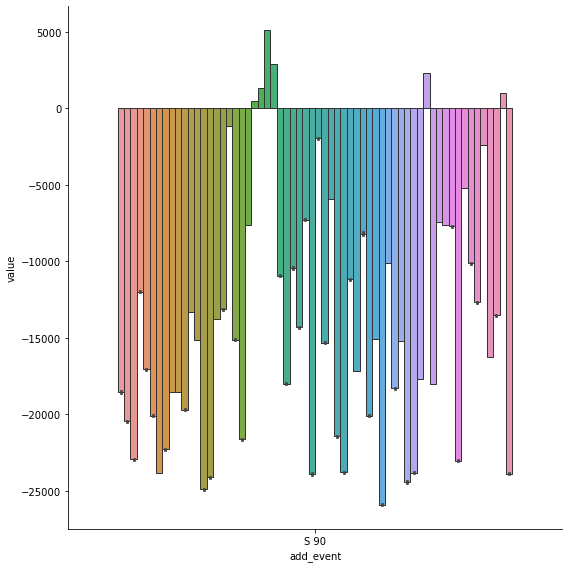

In [21]:
sns.catplot(x="add_event", y="value",
                hue="variable",
                data=project_df_melt[project_df_melt["add_event"].isin(["S 90"]) & ~project_df_melt["variable"].isin(["Fz", "VEOG", "HEOG"])], 
            kind="bar", height=8, edgecolor=".2", legend=None)

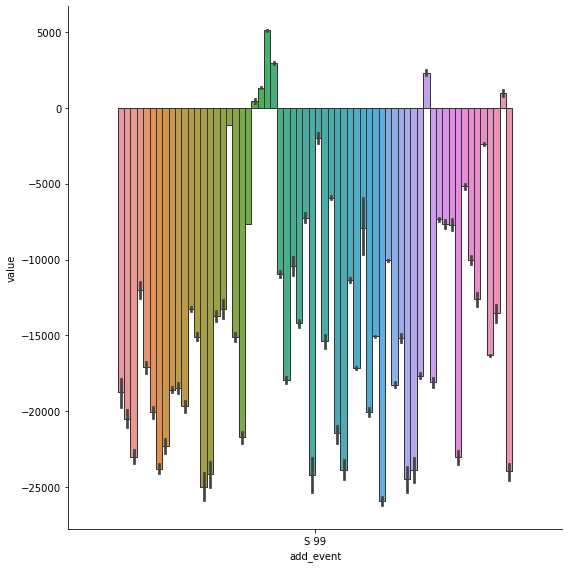

In [22]:
sns.catplot(x="add_event", y="value",
                hue="variable",
                data=project_df_melt[project_df_melt["add_event"].isin(["S 99"]) & ~project_df_melt["variable"].isin(["Fz", "VEOG", "HEOG"])], 
            kind="bar", height=8, edgecolor=".2", legend=None)

### event label code
S100, S101, S102, S103, S104: GAME_OVER \
S 90: SHOOT_BUTTON \
S 91: PLAYER_CRASH_WALL \
S 92: PLAYER_CRASH_ENEMY \
S 93: COLLECT_STAR \
S 94: COLLECT_AMMO \
S 97: MISSILE_HIT_ENEMY \
S 98: ENEMY_LOST \
S 99: GAME_START

## Loading data to pyspark dataframe

In [23]:
from pyspark.sql import SparkSession
#Create PySpark SparkSession
spark = SparkSession.builder \
    .appName("project_data") \
    .getOrCreate()
#Create PySpark DataFrame from Pandas
sparkDF=spark.read.option('header', 'true').option("inferSchema", "true").csv("project_data.csv") 
sparkDF.printSchema()

root
 |-- time: integer (nullable = true)
 |-- Fp1: double (nullable = true)
 |-- Fz: double (nullable = true)
 |-- F3: double (nullable = true)
 |-- F7: double (nullable = true)
 |-- FT9: double (nullable = true)
 |-- FC5: double (nullable = true)
 |-- FC1: double (nullable = true)
 |-- C3: double (nullable = true)
 |-- T7: double (nullable = true)
 |-- TP9: double (nullable = true)
 |-- CP5: double (nullable = true)
 |-- CP1: double (nullable = true)
 |-- Pz: double (nullable = true)
 |-- P3: double (nullable = true)
 |-- P7: double (nullable = true)
 |-- O1: double (nullable = true)
 |-- Oz: double (nullable = true)
 |-- O2: double (nullable = true)
 |-- P4: double (nullable = true)
 |-- P8: double (nullable = true)
 |-- TP10: double (nullable = true)
 |-- CP6: double (nullable = true)
 |-- CP2: double (nullable = true)
 |-- Cz: double (nullable = true)
 |-- C4: double (nullable = true)
 |-- T8: double (nullable = true)
 |-- FT10: double (nullable = true)
 |-- FC6: double (nullable 

In [24]:
sparkDF.show(2)

+-----+-------------------+--------------+----------------+-------------------+---------------+----------------+----------------+-------------------+----------------+----------------+-------------------+-------------------+-------------------+-------------------+-------------------+----------------+---------------+-------------------+------------------+-------------------+-------------------+------------------+------------------+-----------+-----------------+--------------+-------------------+----------------+------------------+-------------------+---------------+-------------------+-------------------+----------------+--------------+-------------------+----------------+------------------+----------------+-------------------+-------------------+----------------+-------------------+-------------------+-------------------+----------------+--------------+-------------------+-------------------+------------------+----------------+------------------+------------------+---------------+------

In [25]:
sparkDF.count()

12207

In [26]:
len(sparkDF.columns)

69

### training model of decision tree classifier: first we will try to build model just classify the event of game start, game over and in game, totally 3 different catagories. In this case, the label will be as following:  
S 99: GAME_START, labelled as 1 \
S 90, S 91, S 92, S 93, S 94, S 97, S 98, in the game, labelled as 2 \
S100, S101, S102, S103, S104: GAME_OVER, labelled as 3 

In [27]:
from pyspark.sql.functions import regexp_replace

df=sparkDF.withColumn('add_event', regexp_replace('add_event', 'S 99', '1')) \
            .withColumn('add_event', regexp_replace('add_event', 'S 90', '2')) \
            .withColumn('add_event', regexp_replace('add_event', 'S 91', '2')) \
            .withColumn('add_event', regexp_replace('add_event', 'S 92', '2')) \
            .withColumn('add_event', regexp_replace('add_event', 'S 93', '2')) \
            .withColumn('add_event', regexp_replace('add_event', 'S 94', '2')) \
            .withColumn('add_event', regexp_replace('add_event', 'S 97', '2')) \
            .withColumn('add_event', regexp_replace('add_event', 'S 98', '2')) \
            .withColumn('add_event', regexp_replace('add_event', 'S100', '3')) \
            .withColumn('add_event', regexp_replace('add_event', 'S101', '3')) \
            .withColumn('add_event', regexp_replace('add_event', 'S102', '3')) \
            .withColumn('add_event', regexp_replace('add_event', 'S103', '3')) \
            .withColumn('add_event', regexp_replace('add_event', 'S104', '3')) 

In [28]:
#drop the columns is not related to the analysis
df1=df.drop("time",'VEOG', 'HEOG', 'duration', 'event')

In [29]:
from pyspark.ml.feature import RFormula

In [30]:
formula = RFormula(
    formula="add_event ~ .",
    featuresCol="features",
    labelCol="label")

output = formula.fit(df1).transform(df1)
output.select("features", "label").show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[-21769.482421875...|  1.0|
|[-21771.093749999...|  1.0|
|[-21771.484375,92...|  1.0|
|[-21738.427734375...|  0.0|
|[-21739.697265625...|  0.0|
|[-21739.306640624...|  0.0|
|[-21748.4375,9236...|  0.0|
|[-21748.53515625,...|  0.0|
|[-21747.998046874...|  0.0|
|[-21709.423828124...|  0.0|
|[-21708.349609375...|  0.0|
|[-21720.8984375,9...|  0.0|
|[-21717.3828125,9...|  0.0|
|[-21724.70703125,...|  0.0|
|[-21724.21875,925...|  0.0|
|[-21702.636718749...|  0.0|
|[-21701.708984375...|  0.0|
|[-21702.636718749...|  0.0|
|[-21717.724609375...|  0.0|
|[-21719.384765625...|  0.0|
+--------------------+-----+
only showing top 20 rows



In [31]:
output.select("label").distinct().collect()

[Row(label=0.0), Row(label=1.0), Row(label=2.0)]

In [32]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [33]:
labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(output)

# Automatically identify categorical features, and index them.
# We specify maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer = (VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=3).fit(output))

(trainingData, testData) = output.randomSplit([0.7, 0.3], seed=12345)

dt = DecisionTreeClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures")

pipeline = Pipeline(stages=[labelIndexer, featureIndexer, dt])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "indexedLabel", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g " % (1.0 - accuracy))

treeModel = model.stages[2]
# summary only
print(treeModel)

+----------+------------+--------------------+
|prediction|indexedLabel|            features|
+----------+------------+--------------------+
|       0.0|         0.0|[-21739.697265625...|
|       0.0|         0.0|[-21724.70703125,...|
|       0.0|         0.0|[-21717.724609375...|
|       0.0|         0.0|[-21690.087890624...|
|       0.0|         0.0|[-21690.087890624...|
+----------+------------+--------------------+
only showing top 5 rows

Test Error = 0.00218221 
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_f529ff142492, depth=5, numNodes=25, numClasses=3, numFeatures=63


### further analysis classify between event: crash wall, crash enemy, missile hit:
S 91: crash wall; S 92 crash enemy; S 97 missile hit

In [34]:
from pyspark.sql.functions import regexp_replace
sparkDF2=sparkDF.filter(sparkDF.add_event.isin(["S 91", "S 92", "S 97"]))

df=sparkDF2.withColumn('add_event', regexp_replace('add_event', 'S 91', '1')) \
            .withColumn('add_event', regexp_replace('add_event', 'S 92', '2')) \
            .withColumn('add_event', regexp_replace('add_event', 'S 97', '3')) 

df1=df.drop("time",'VEOG', 'HEOG', 'duration', 'event')

formula = RFormula(
    formula="add_event ~ .",
    featuresCol="features",
    labelCol="label")

output = formula.fit(df1).transform(df1)
output.select("features", "label").show()

labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(output)

# Automatically identify categorical features, and index them.
# We specify maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer = (VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=3).fit(output))

(trainingData, testData) = output.randomSplit([0.7, 0.3], seed=12345)

dt = DecisionTreeClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures")

pipeline = Pipeline(stages=[labelIndexer, featureIndexer, dt])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "indexedLabel", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g " % (1.0 - accuracy))

treeModel = model.stages[2]
# summary only
print(treeModel)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[-21748.4375,9236...|  0.0|
|[-21748.53515625,...|  0.0|
|[-21747.998046874...|  0.0|
|[-21717.3828125,9...|  0.0|
|[-21724.70703125,...|  0.0|
|[-21724.21875,925...|  0.0|
|[-21653.22265625,...|  2.0|
|[-21655.46875,927...|  2.0|
|[-21658.203124999...|  2.0|
|[-21651.904296875...|  2.0|
|[-21651.416015624...|  2.0|
|[-21649.8046875,9...|  2.0|
|[-21657.32421875,...|  0.0|
|[-21654.736328125...|  0.0|
|[-21650.488281249...|  0.0|
|[-21641.9921875,9...|  0.0|
|[-21643.261718749...|  0.0|
|[-21647.021484374...|  0.0|
|[-21670.703125,92...|  0.0|
|[-21668.84765625,...|  0.0|
+--------------------+-----+
only showing top 20 rows

+----------+------------+--------------------+
|prediction|indexedLabel|            features|
+----------+------------+--------------------+
|       0.0|         0.0|[-21670.703125,92...|
|       2.0|         2.0|[-21653.22265625,...|
|       2.0|         2.0|[-21649.8046875,9.

### pipeline paramgridbuilder method with hyperparameter turning to find the best model to classify the three different event: crash wall, crash enemy, missile hit.

In [35]:
from pyspark.sql.functions import regexp_replace
sparkDF2=sparkDF.filter(sparkDF.add_event.isin(["S 91", "S 92", "S 97"]))

df=sparkDF2.withColumn('add_event', regexp_replace('add_event', 'S 91', '1')) \
            .withColumn('add_event', regexp_replace('add_event', 'S 92', '2')) \
            .withColumn('add_event', regexp_replace('add_event', 'S 97', '3')) 

df1=df.drop("time",'VEOG', 'HEOG', 'duration', 'event')

formula = RFormula(
    formula="add_event ~ .",
    featuresCol="features",
    labelCol="label")

output = formula.fit(df1).transform(df1)
output.select("features", "label").show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[-21748.4375,9236...|  0.0|
|[-21748.53515625,...|  0.0|
|[-21747.998046874...|  0.0|
|[-21717.3828125,9...|  0.0|
|[-21724.70703125,...|  0.0|
|[-21724.21875,925...|  0.0|
|[-21653.22265625,...|  2.0|
|[-21655.46875,927...|  2.0|
|[-21658.203124999...|  2.0|
|[-21651.904296875...|  2.0|
|[-21651.416015624...|  2.0|
|[-21649.8046875,9...|  2.0|
|[-21657.32421875,...|  0.0|
|[-21654.736328125...|  0.0|
|[-21650.488281249...|  0.0|
|[-21641.9921875,9...|  0.0|
|[-21643.261718749...|  0.0|
|[-21647.021484374...|  0.0|
|[-21670.703125,92...|  0.0|
|[-21668.84765625,...|  0.0|
+--------------------+-----+
only showing top 20 rows



In [36]:
labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(output)

# Automatically identify categorical features, and index them.
# We specify maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer = (VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=3).fit(output))

(trainingData, testData) = output.randomSplit([0.7, 0.3], seed=13)

dt = DecisionTreeClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures")

pipeline = Pipeline(stages=[labelIndexer, featureIndexer, dt])

# model = pipeline.fit(trainingData)

In [37]:
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")

In [38]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

grid = ParamGridBuilder() \
    .addGrid(dt.impurity, ["gini", "entropy"]) \
    .addGrid(dt.maxBins, [5, 10, 15]) \
    .addGrid(dt.minInfoGain, [0.0, 0.2, 0.4]) \
    .addGrid(dt.maxDepth, [3, 5, 7]) \
    .build()

In [39]:
cv= CrossValidator(estimator=pipeline, evaluator=evaluator, estimatorParamMaps=grid, numFolds=3)

cvModel = cv.fit(trainingData)

In [40]:
#print out the hyperparameter of best model

best_Model = cvModel.bestModel

predictions=best_Model.transform(testData)
predictions.select("prediction", "indexedLabel", "features").show(5) #select("prediction", "indexedLabel", "features", "accuracy")

test_metric = evaluator.evaluate(best_Model.transform(testData))
print("Test Error = %g " % (1.0 - test_metric))

for x in range(len(best_Model.stages)):
    print(best_Model.stages[x])
    
java_model = best_Model.stages[-1]._java_obj
{param.name: java_model.getOrDefault(java_model.getParam(param.name)) 
    for param in grid[0]}

+----------+------------+--------------------+
|prediction|indexedLabel|            features|
+----------+------------+--------------------+
|       0.0|         0.0|[-21748.4375,9236...|
|       0.0|         0.0|[-21717.3828125,9...|
|       0.0|         0.0|[-21654.736328125...|
|       0.0|         1.0|[-21593.701171875...|
|       2.0|         0.0|[-21581.201171874...|
+----------+------------+--------------------+
only showing top 5 rows

Test Error = 0.27176 
StringIndexerModel: uid=StringIndexer_fb606add02bf, handleInvalid=error
VectorIndexerModel: uid=VectorIndexer_6fabd9376fbb, numFeatures=63, handleInvalid=error
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_0ef63c4fe303, depth=7, numNodes=143, numClasses=3, numFeatures=63


{'impurity': 'gini', 'maxBins': 10, 'minInfoGain': 0.0, 'maxDepth': 7}